<a href="https://colab.research.google.com/github/Sowmya74/MachineLearning/blob/main/Iris_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [2]:
df = pd.read_csv("iris.data", header=None)

In [3]:
df.head(3)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [5]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [6]:
df.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.shape

(150, 5)

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.species.nunique()

3

In [11]:
df.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Data Visualization

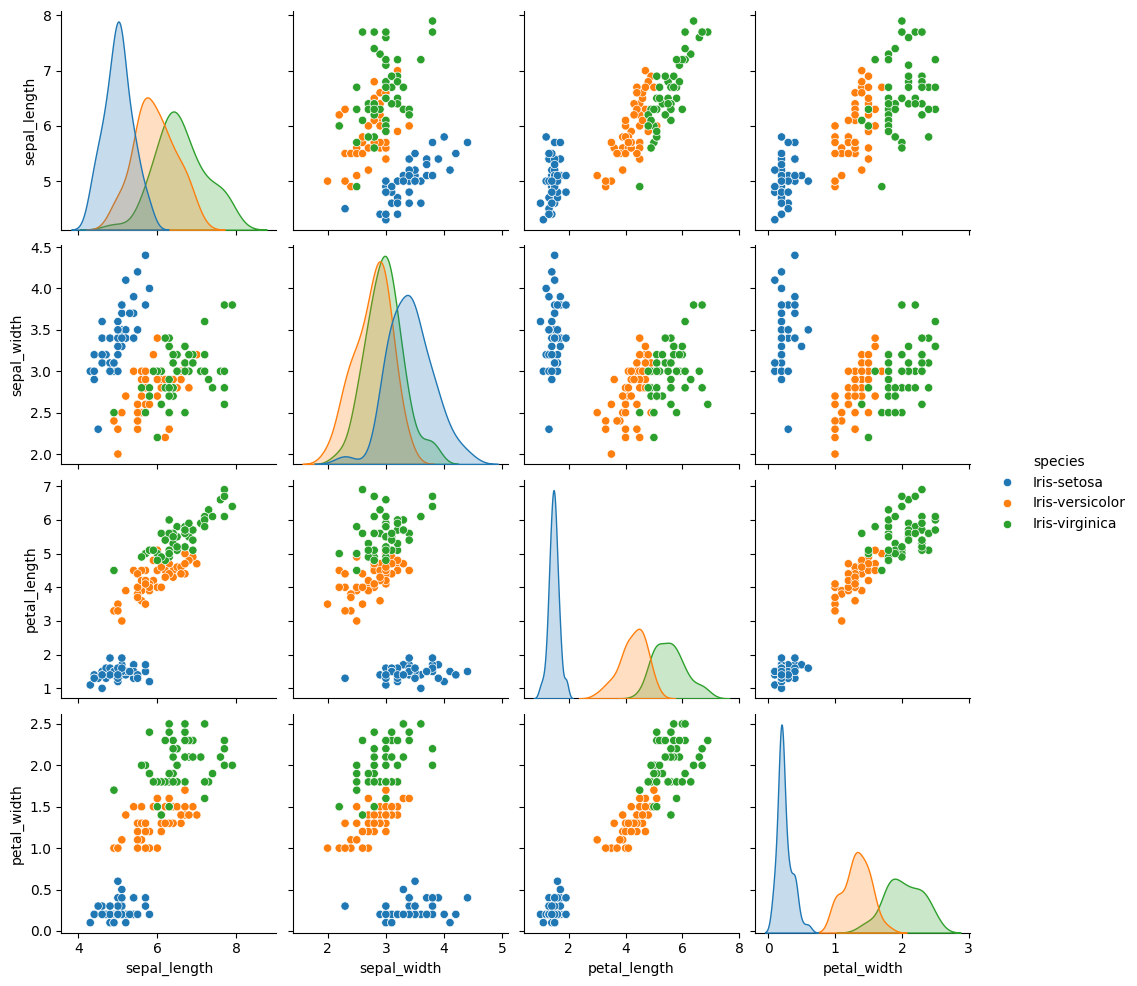

In [13]:
sns.pairplot(df, hue='species')

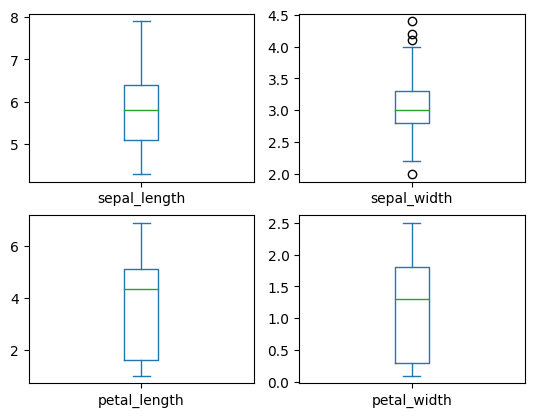

In [14]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

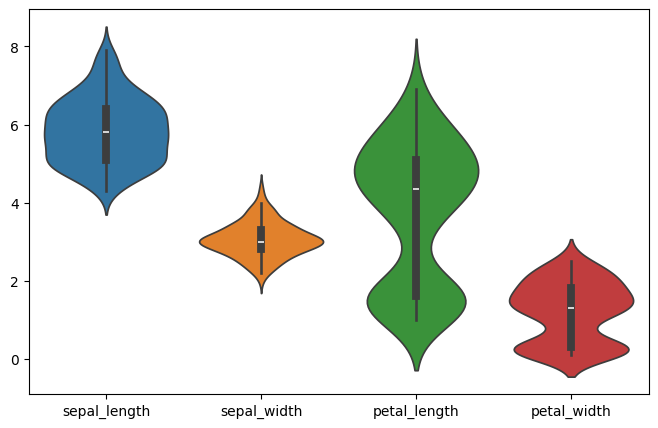

In [15]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df.iloc[:, :-1])
plt.show()


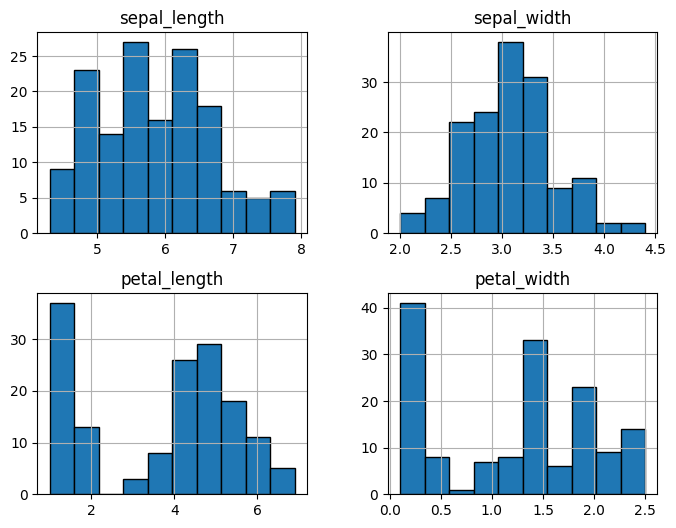

In [16]:
df.hist(edgecolor='black', bins=10, figsize=(8, 6))
plt.show()

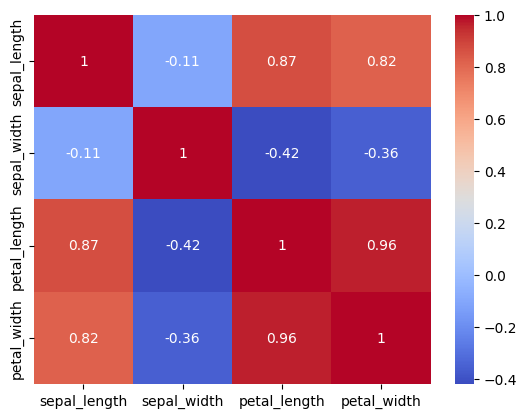

In [17]:
corr = df.iloc[:, :-1].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


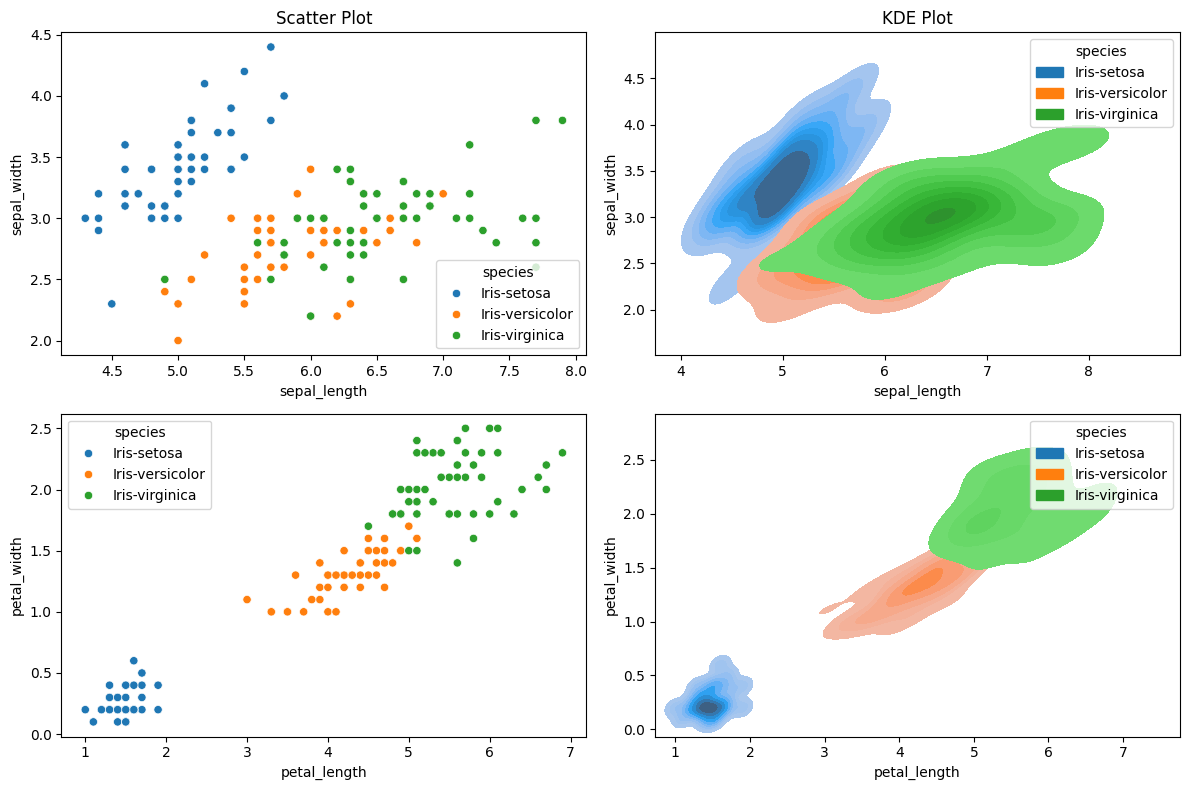

In [18]:
# Create a figure with subplots
fig, axes = plt.subplots(2,2,figsize=(12, 8))

# Scatter plot for sepal length vs sepal width
sns.scatterplot(ax=axes[0,0], x='sepal_length', y='sepal_width', hue='species', data=df)
axes[0,0].set_title('Scatter Plot')

# Scatter plot for petal length vs petal width
sns.scatterplot(ax=axes[1,0], x='petal_length', y='petal_width', hue='species', data=df)

# KDE plot for sepal length vs sepal width
sns.kdeplot(ax=axes[0,1], x='sepal_length', y='sepal_width', hue='species', fill=True, data=df)
axes[0,1].set_title('KDE Plot')

# KDE plot for petal length vs petal width
sns.kdeplot(ax=axes[1,1], data=df, x='petal_length', y='petal_width', hue='species', fill=True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


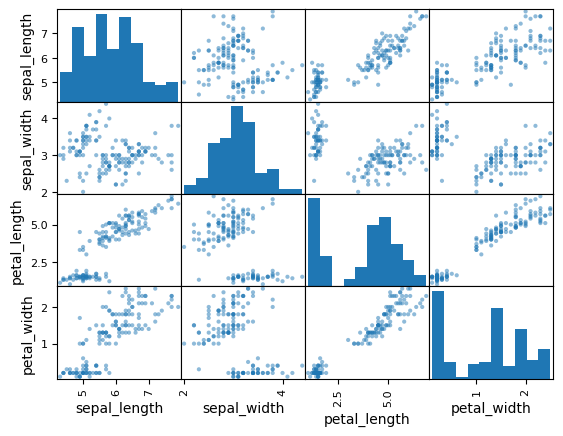

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

### ML Algorithms

As the iris data is classification problem, worked on the dataset with classifiers

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [21]:
# Split the data into features and target
X = df.drop('species', axis=1) #Features
y = df['species']  #Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [22]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))



KNN Accuracy: 1.0
KNN Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

KNN Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


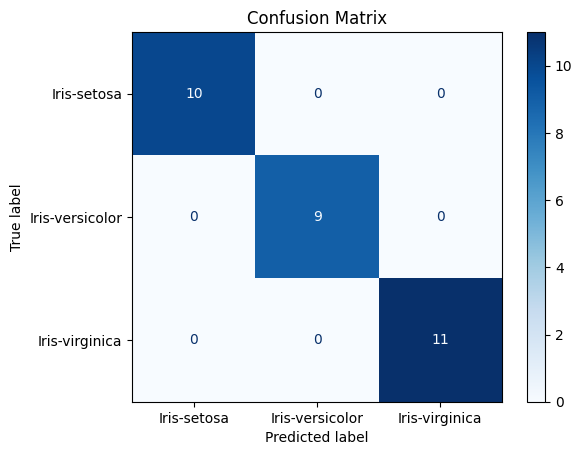

In [23]:
# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [24]:
# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.9666666666666667
SVM Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

SVM Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


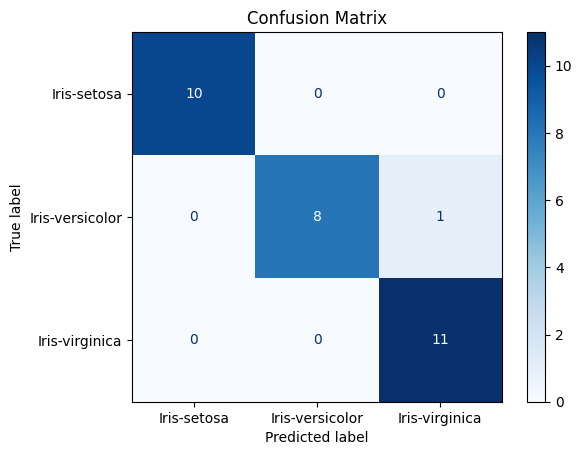

In [25]:
# Compute and plot the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [26]:
# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Decision Tree Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


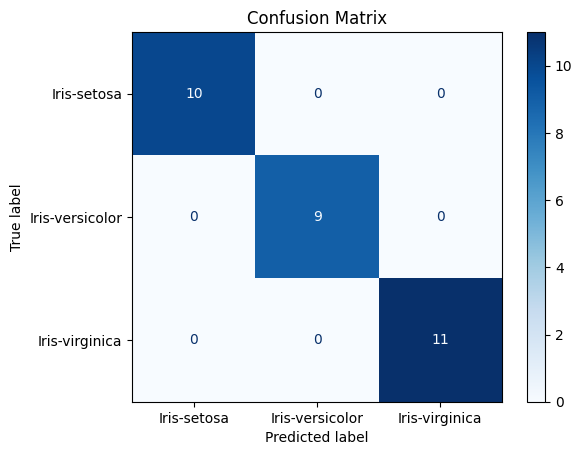

In [27]:
# Compute and plot the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_tree, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=tree.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [28]:
# Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_forest))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))

Random Forest Accuracy: 1.0
Random Forest Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Random Forest Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


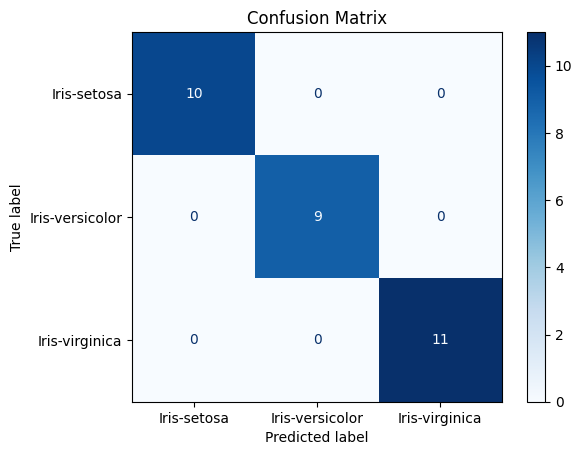

In [29]:
# Compute and plot the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_forest, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=forest.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [30]:
# Train the Logistic Regression classifier
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict the test set results
y_pred_LogR = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_LogR))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_LogR))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_LogR))


Logistic Regression Accuracy: 1.0
Logistic Regression Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Logistic Regression Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


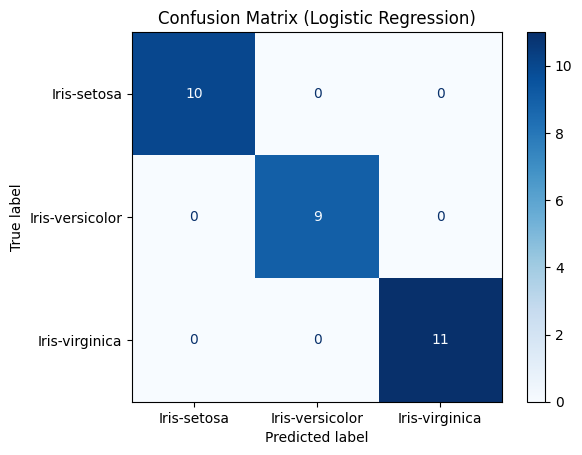

In [31]:
# Compute and plot the confusion matrix
cm_LogR = confusion_matrix(y_test, y_pred_LogR, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_LogR, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

In [32]:
#Comparing all the accuracies

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_LogR))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 1.0
Decision Tree Accuracy: 1.0
SVM Accuracy: 0.9666666666666667
KNN Accuracy: 1.0


In [33]:
# Calculate precision for Logistic Regression
precision_log_reg = precision_score(y_test, y_pred_LogR, average='weighted')

# Calculate precision for SVM
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')

# Calculate precision for Decision Tree
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')

precision_forest = precision_score(y_test, y_pred_forest, average='weighted')

precision_knn = precision_score(y_test, y_pred_knn, average='weighted')


print("Precision for Logistic Regression:", precision_log_reg)
print("Precision for SVM:", precision_svm)
print("Precision for Decision Tree:", precision_tree)
print("Precision for Random Forest:", precision_forest)
print("Precision for KNN:", precision_knn)


Precision for Logistic Regression: 1.0
Precision for SVM: 0.9694444444444444
Precision for Decision Tree: 1.0
Precision for Random Forest: 1.0
Precision for KNN: 1.0
